<a href="https://colab.research.google.com/github/EliasHaddad00/California-Housing-Prices/blob/main/ejhqz_assignment_3_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [103]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Your code goes here for this section.
np.random.seed(42)
PATH_URL = "https://raw.githubusercontent.com/EliasHaddad00/California-Housing-Prices/main/housing.csv"
data = pd.read_csv(PATH_URL)
# discovering data through info() and describe() then checking for null to clean
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [104]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [105]:
from sklearn.compose import ColumnTransformer
#from end to end project
num_pipeline = Pipeline([
              ('imputer', SimpleImputer(strategy="median")),
              ('std_scaler', StandardScaler()),
])

housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
              ('num', num_pipeline, num_attribs),
              ("cat", OneHotEncoder(), cat_attribs),
])

In [106]:
housing = data.dropna()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]

# use the pipeline to the dataset
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(20433, 14)

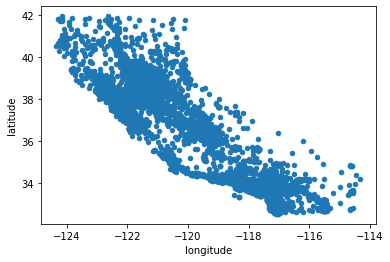

In [107]:
#now that we have cleaned the data, lets vizualize
data.plot(kind="scatter", x="longitude", y="latitude")

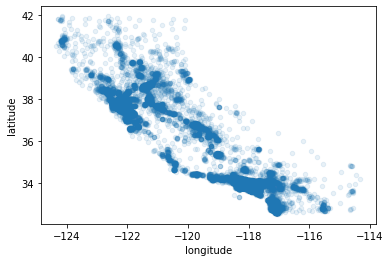

In [108]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

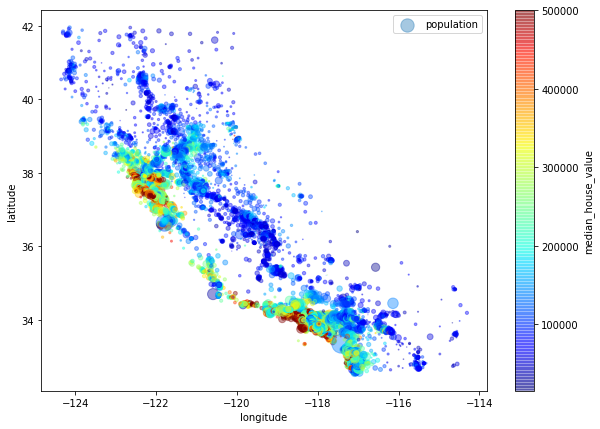

In [109]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#you will notice the price increases along the coast, more specifically, LA, San Fran, San Deigo 

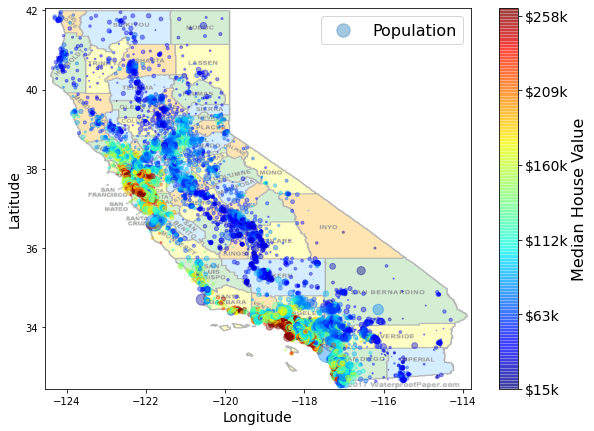

In [110]:
import matplotlib.image as mpimg
from skimage import io
# Read the image of California with counties
img_url = "https://raw.githubusercontent.com/EliasHaddad00/California-Housing-Prices/main/california-county-map.png"
california_img = io.imread(img_url) 
ax = data.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=data['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd73bb70b00>,
      dtype=object)

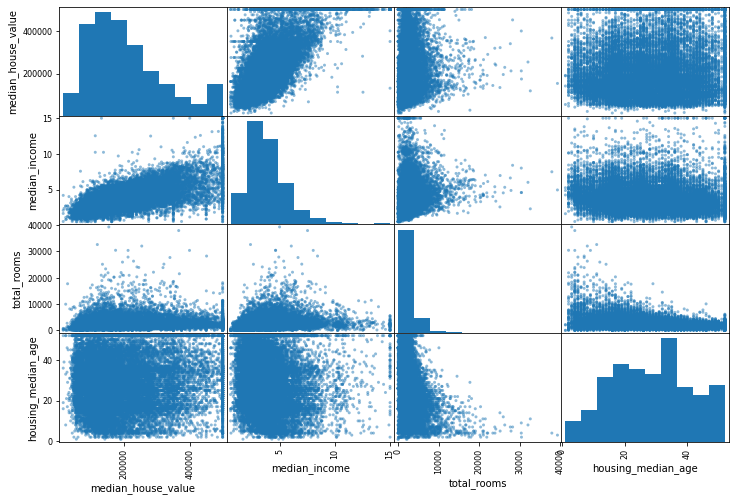

In [111]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

# **Summary thus far:**


*   First we imported the cvs dataset from github and discovered the dataset. This means we checked the columns it has, the mean, max, min, etc. of each column and the data types of each column.
*   Then we cleaned the data by replacing the Nan with the median value of the repective column. and then represented the catagories with numbers by using a oneHotEncoder
*   Then we visualized the data, as we did in the end to end project.

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

# Summary of what I am doing below

*   As mentioned above the Minkovski Distance can be used to find the manhattan, euclidean and sup. so thats what I did.
*   Then I created a kmeans class, with functions to:
    *   Create and intialize a centroids
    *   Populate centroids with datapoints depending on distance
    *   Recalculate centoids accodingly
    *   Return the clusters,centroids and populated list
    *   Calculate means and standard deviation
    *   Calculate the Sum Squared Error





In [112]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
import random

def dist_minkovski(x, y, p):
  normal=np.linalg.norm(x - y, ord = p)
  return normal

def dist_manhattan(x, y):
  return dist_minkovski(x, y, 1)
def dist_euclidean(x, y):
  return dist_minkovski(x, y, 2)
def dist_sup(x, y):
  return dist_minkovski(x, y, np.inf)

class kmeans(object):
  def __init__(self, k=2, slack=0.001, dist_measure='euclidean'):
    self.k = k
    self.slack = slack
    self.dist_measure = dist_measure

  def initialize_centroids(self, data):
    k = self.k
    initial_centroids = []
    ind = []
    for i in range(self.k):
      ind.append(random.randint(0,data.shape[0]+1))
    for j in range(self.k):
      initial_centroids.append(data[ind[j]])
    return initial_centroids
  
  def populate(self, data):
    self.clusters = []
    for i in range(self.k):
      self.clusters.append([]) 
    populated = []
    centroids = self.centroids
    for row in data:
      dist = []
      for i in range(len(centroids)):
        if self.dist_measure == 'euclidean':
          dist.append(euclidean_dist(row, centroids[i]))
        elif self.dist_measure == 'manhattan':
          dist.append(manhattan_dist(row, centroids[i]))
        else:
          dist.append(sup_dist(row, centroids[i]))
      index = dist.index(min(dist))
      self.clusters[index].append(row)
      populated.append(index)
    return populated

  def update(self):
    for centroid in range(len(self.clusters)):
      self.centroids[centroid] = np.average(self.clusters[centroid], axis=0)

    return self.centroids

  def fit(self, data):
    self.centroids = self.initialize_centroids(data)
    iterations = 0
    best_case = False
    while((not best_case) and (iterations <= 450)):
      previous = self.centroids.copy()
      populated = self.populate(data)
      updated = self.update()
      change=[]
      for centroid in range(len(updated)):
        change.append(np.sum(abs(updated[centroid] - previous[centroid])))
      if sum(change) <= self.slack:
        best_case = True
      iterations += 1
    return self.clusters, self.centroids, populated
  
  def sum_sqaured_error(self):
    errors = []
    for i in range(len(self.centroids)):
      difference = 0
      for j in range(len(self.clusters[i])):
        difference += euclidean_dist(self.clusters[i][j], self.centroids[i])
      errors.append(difference)
      return sum(errors)
  
  def test(self):
    means = []
    standard_deviation = []
    for i in range(len(self.clusters)):
      means.append(np.average(self.clusters[i], axis=0))
      standard_deviation.append(np.std(self.clusters[i], axis=0))
    return means, standard_deviation

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


# Summary of what I am doing below
*   First I will create a method that can plot every clustering, k=2...10, this is mostly a replica of the on from the end to end project.
*   Then I call my fitting function from my kmeans class above and create clusters, centroids, populated data records.
*   Then for each cluster I print out the cluster mean, SSE, centroids and standard deivation.
*   I then plot out all the populated lists at the very bottom.



In [113]:
# Your code goes here

def plot_clusters(populated, title):
  colors = 10*["r", "g", "c", "b", "k","m","y","orange","purple","brown"]

  ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7), alpha=0.5, c=[colors[i] for i in populated])

  plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.4)

  plt.ylabel("Latitude", fontsize=14)
  plt.xlabel("Longitude", fontsize=14)
  plt.title(title)
  plt.show
# Your paragraph goes here for this section

In [114]:
k2means = kmeans(k=2, slack=0) 
clusters, centroids, populated2 = k2means.fit(housing_prepared)
means, standard_deviation = k2means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k2means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([-1.02402273,  1.05331612,  0.03785459, -0.11651034, -0.1507945 ,
       -0.18983442, -0.15157025, -0.07021432, -0.13179105,  0.17383918,
        0.47508494,  0.        ,  0.25526614,  0.09580974]), array([ 7.79291620e-01, -8.01584188e-01, -2.88077271e-02,  8.86655435e-02,
        1.14756132e-01,  1.44465907e-01,  1.15346489e-01,  5.34338023e-02,
        1.00294320e-01,  6.46298371e-01,  1.98310782e-01,  4.30923037e-04,
        1.37895372e-03,  1.53580970e-01])]
------------------------means------------------------
[array([-1.02402273,  1.05331612,  0.03785459, -0.11651034, -0.1507945 ,
       -0.18983442, -0.15157025, -0.07021432, -0.13179105,  0.17383918,
        0.47508494,  0.        ,  0.25526614,  0.09580974]), array([ 7.79291620e-01, -8.01584188e-01, -2.88077271e-02,  8.86655435e-02,
        1.14756132e-01,  1.44465907e-01,  1.15346489e-01,  5.34338023e-02,
        1.00294320e-01,  6.46298371e-01,  1.98310782e-01, 

In [115]:
k3means = kmeans(k=3, slack=0)
clusters, centroids, populated3 = k3means.fit(housing_prepared)
means, standard_deviation = k3means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k3means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([-1.03471385,  1.06861036,  0.0759599 , -0.20814105, -0.24444775,
       -0.27890579, -0.24972137, -0.0735844 , -0.13175307,  0.17220142,
        0.4736143 ,  0.        ,  0.25757759,  0.09660669]), array([ 0.20136319, -0.17789332, -0.94845221,  2.36300966,  2.43098308,
        2.24038324,  2.42406378,  0.1926125 ,  0.14265526,  0.46281975,
        0.35276621,  0.        ,  0.08149911,  0.10291493]), array([ 7.85977834e-01, -8.16552735e-01,  9.21902653e-02, -2.14745790e-01,
       -1.96944967e-01, -1.39095152e-01, -1.91663506e-01,  2.72725394e-02,
        8.12953595e-02,  6.52277719e-01,  1.89189189e-01,  4.77509311e-04,
        0.00000000e+00,  1.58055582e-01])]
------------------------means------------------------
[array([-1.03471385,  1.06861036,  0.0759599 , -0.20814105, -0.24444775,
       -0.27890579, -0.24972137, -0.0735844 , -0.13175307,  0.17220142,
        0.4736143 ,  0.        ,  0.25757759,  0.09660669]), arr

In [116]:
k4means = kmeans(k=4, slack=0)
clusters, centroids, populated4 = k4means.fit(housing_prepared)
means, standard_deviation = k4means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k4means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([-1.01038096,  1.10367031,  0.05610597, -0.24042979, -0.2437895 ,
       -0.2752953 , -0.25420488, -0.31920468, -0.40481446,  0.14798831,
        0.53306418,  0.        ,  0.237366  ,  0.08158151]), array([-1.42411581e-02, -2.08371795e-01,  9.90840321e-02,  4.55517693e-02,
       -2.06956100e-01, -2.65020377e-01, -1.85700624e-01,  1.53331850e+00,
        1.72112113e+00,  6.09924417e-01,  6.11238909e-02,  3.28623069e-04,
        1.43936904e-01,  1.84686165e-01]), array([ 0.18975274, -0.16010412, -0.97648209,  2.47444373,  2.56087005,
        2.36569445,  2.55401735,  0.13609107,  0.0742005 ,  0.45885451,
        0.36208032,  0.        ,  0.08360764,  0.09545754]), array([ 8.07167113e-01, -8.11509013e-01,  8.96356327e-02, -2.49802816e-01,
       -1.73694087e-01, -9.31844746e-02, -1.71329616e-01, -2.96934083e-01,
       -2.81111866e-01,  6.23618785e-01,  2.22260589e-01,  4.60405157e-04,
        0.00000000e+00,  1.53660221e-0

In [117]:
k5means = kmeans(k=5, slack=0)
clusters, centroids, populated5 = k5means.fit(housing_prepared)
means, standard_deviation = k5means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------stdstandard deviations------------------------")
print(standard_deviation)
sum_sqaured_error = k5means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([ 0.20662873, -0.16871811, -1.00251832,  2.56415061,  2.64612288,
        2.45617383,  2.63885637,  0.12823153,  0.03713381,  0.45550847,
        0.375     ,  0.        ,  0.0769774 ,  0.09251412]), array([-0.87204775,  1.15377069, -0.1434546 , -0.28487052, -0.28320589,
       -0.30500712, -0.30783337, -0.53319067, -0.78288621,  0.0954132 ,
        0.73466228,  0.        ,  0.13431392,  0.03561061]), array([-1.29118213,  0.92924492,  0.42389379, -0.05001127, -0.14398737,
       -0.20017758, -0.11663482,  0.62722793,  0.91106517,  0.28784041,
        0.05731476,  0.        ,  0.46421786,  0.19062698]), array([ 8.10574096e-01, -8.14376523e-01,  1.17558616e-01, -2.65988949e-01,
       -1.70421218e-01, -8.12241668e-02, -1.69873452e-01, -3.65975436e-01,
       -3.46329041e-01,  6.16143946e-01,  2.25415469e-01,  2.49906285e-04,
        0.00000000e+00,  1.58190678e-01]), array([ 6.70811866e-01, -7.95733888e-01, -4.41362410e-02, 

In [118]:
k6means = kmeans(k=6, slack=0)
clusters, centroids, populated6 = k6means.fit(housing_prepared)
means, standard_deviation = k6means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k6means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([ 0.50470177, -0.6548557 , -0.03162835, -0.00966813, -0.27496005,
       -0.30568307, -0.25535704,  1.61026202,  1.63713521,  0.73124205,
        0.07206443,  0.        ,  0.02246715,  0.17422637]), array([ 0.21470535, -0.21592553, -0.81259379,  1.32593329,  1.4781387 ,
        1.3454045 ,  1.47591661,  0.00624289,  0.02726265,  0.49174236,
        0.3241123 ,  0.        ,  0.0685384 ,  0.11560694]), array([-0.81179021,  1.16046441, -0.26124353, -0.30460339, -0.31228288,
       -0.33437019, -0.34116221, -0.54368572, -0.82883479,  0.07425414,
        0.81723757,  0.        ,  0.07447514,  0.03403315]), array([-1.30376735,  0.95232791,  0.63270665, -0.19185347, -0.24479089,
       -0.29142775, -0.22398532,  0.3219305 ,  0.63552541,  0.26293366,
        0.0499087 ,  0.        ,  0.51612903,  0.17102861]), array([ 0.37418956, -0.28421973, -1.32883282,  5.35126052,  5.18381133,
        4.99693477,  5.14561367,  0.31534374,  0.

In [119]:
k7means = kmeans(k=7, slack=0)
clusters, centroids, populated7 = k7means.fit(housing_prepared)
means, standard_deviation = k7means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k7means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([-1.3196195 ,  0.9797308 ,  0.88531397, -0.33061598, -0.36240205,
       -0.40745838, -0.34857884,  0.14925728,  0.4971306 ,  0.21634783,
        0.05391304,  0.        ,  0.56208696,  0.16765217]), array([ 0.34260904, -0.26993435, -1.2194454 ,  4.55427031,  4.47658117,
        4.22301171,  4.43966683,  0.2932085 ,  0.09945123,  0.42615012,
        0.42615012,  0.        ,  0.06779661,  0.07990315]), array([-1.10194647,  1.02147125, -0.75368788,  0.94100755,  0.9268099 ,
        0.82582085,  0.96232586,  0.13736258,  0.06635821,  0.3028607 ,
        0.37562189,  0.        ,  0.21393035,  0.10758706]), array([ 0.84689791, -0.81875078, -0.67672   ,  0.7990502 ,  0.99293776,
        0.94642537,  0.97642115, -0.11463845, -0.06177434,  0.58842315,
        0.26546906,  0.        ,  0.        ,  0.14610778]), array([ 0.39406647, -0.56129853, -0.0297063 , -0.03042301, -0.30877022,
       -0.33431222, -0.28952932,  1.71704838,  1.

In [120]:
k8means = kmeans(k=8, slack=0)
clusters, centroids, populated8 = k8means.fit(housing_prepared)
means, standard_deviation = k8means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k8means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([ 0.75272392, -0.76529242, -0.4347038 ,  0.51664498,  0.71448114,
        0.7512176 ,  0.71499377, -0.19317481, -0.07984839,  0.63107997,
        0.22382523,  0.        ,  0.        ,  0.14509481]), array([-0.17119164,  0.16715443, -0.93681652,  2.01731669,  2.08943743,
        1.86530978,  2.09535239,  0.18520008,  0.12618778,  0.40542763,
        0.37335526,  0.        ,  0.12664474,  0.09457237]), array([-0.81625935,  1.18114222, -0.32047717, -0.27830138, -0.28882323,
       -0.31269282, -0.31600974, -0.52172619, -0.81715065,  0.07792505,
        0.83592322,  0.        ,  0.05758684,  0.0285649 ]), array([ 0.70894763, -0.77339637,  0.79660966, -0.48740872, -0.44162774,
       -0.32294002, -0.42657034, -0.3265647 , -0.18716532,  0.75577484,
        0.13029827,  0.00112133,  0.        ,  0.11280556]), array([ 0.34226616, -0.28041347, -1.39016254,  6.09487525,  5.79952578,
        5.66686641,  5.80744759,  0.42217255,  0.

In [122]:
k9means = kmeans(k=9, slack=0)
clusters, centroids, populated9 = k9means.fit(housing_prepared)
means, standard_deviation = k9means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k9means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([-0.05059693,  0.05793045, -0.95251082,  2.16440626,  2.24302567,
        2.01843668,  2.249406  ,  0.19522496,  0.12506607,  0.4232902 ,
        0.37615527,  0.        ,  0.11182994,  0.08872458]), array([ 0.70116459, -0.78924798,  0.79957641, -0.48168362, -0.43184367,
       -0.30774732, -0.41513541, -0.3036072 , -0.14507028,  0.82690891,
        0.06653572,  0.00098208,  0.        ,  0.10557329]), array([-0.87780467,  1.18859798, -0.78386415, -0.06883844, -0.07953478,
       -0.12294772, -0.10691355, -0.33179732, -0.63296115,  0.13780598,
        0.7473557 ,  0.        ,  0.07827138,  0.03656694]), array([-1.09439867,  1.08949609,  0.96023276, -0.51021387, -0.49187308,
       -0.50872563, -0.49679909, -0.55024007, -0.54548632,  0.1136612 ,
        0.43934426,  0.        ,  0.36247723,  0.0845173 ]), array([-1.29406338,  0.91649594,  0.32512622, -0.00936648, -0.1692717 ,
       -0.22178677, -0.13839303,  1.0294951 ,  1.

In [123]:
k10means = kmeans(k=10, slack=0)
clusters, centroids, populated10 = k10means.fit(housing_prepared)
means, standard_deviation = k10means.test()
print("------------------------centroids------------------------")
print(centroids)
print("------------------------means------------------------")
print(means)
print("------------------------standard deviation------------------------")
print(standard_deviation)
sum_sqaured_error = k10means.sum_sqaured_error()
print("------------------------sum squared error------------------------")
print(sum_sqaured_error)

------------------------centroids------------------------
[array([ 0.16911447, -0.1428099 , -0.99344041,  2.52378392,  2.62798108,
        2.38898116,  2.62157202,  0.19025509,  0.11312773,  0.45407503,
        0.37257439,  0.        ,  0.08796895,  0.08538163]), array([-0.5170163 ,  0.25054263, -0.0061063 ,  0.0609227 , -0.35826873,
       -0.33210873, -0.3314465 ,  2.84278244,  2.14463214,  0.51522248,
        0.07845433,  0.        ,  0.22482436,  0.18149883]), array([ 0.98452398, -0.86916392, -0.78301447, -0.30590619, -0.26073704,
       -0.26746086, -0.2913329 , -0.30149721, -0.49886075,  0.35059423,
        0.41213922,  0.        ,  0.        ,  0.23726655]), array([ 0.32122489, -0.25689957, -1.44794361,  6.63640966,  6.2585818 ,
        6.08965919,  6.26107826,  0.44665655,  0.15105127,  0.44078947,
        0.40131579,  0.        ,  0.06578947,  0.09210526]), array([ 7.20093916e-01, -7.77643744e-01,  7.94542955e-01, -4.99078340e-01,
       -4.35480677e-01, -2.84302272e-01, -4.21

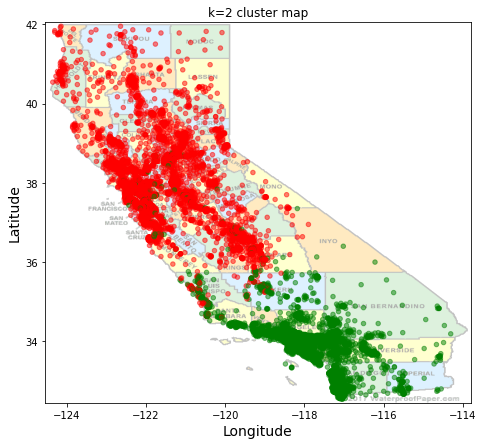

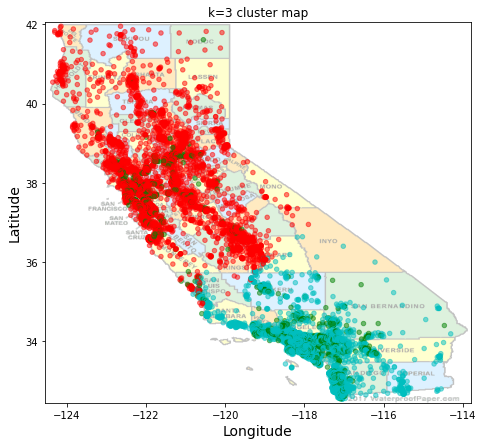

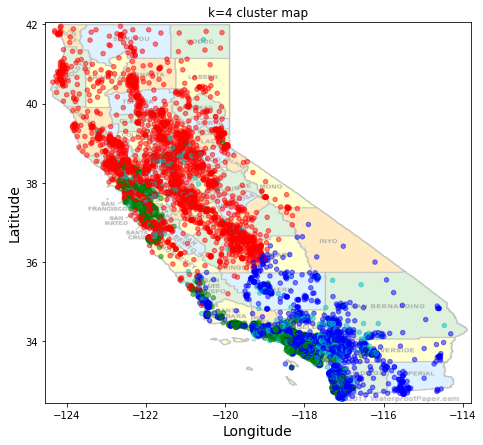

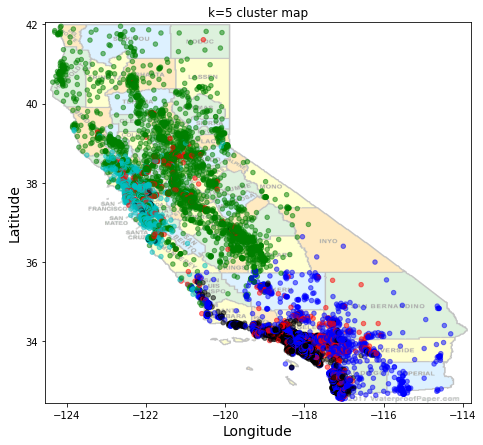

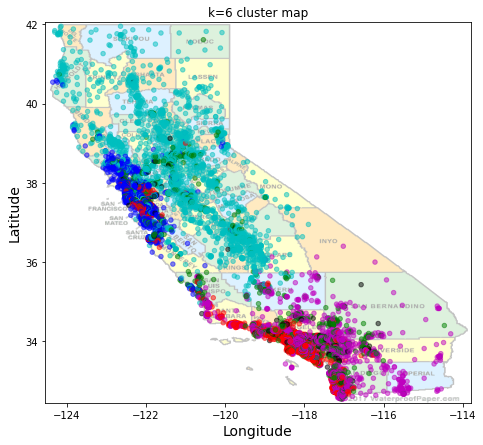

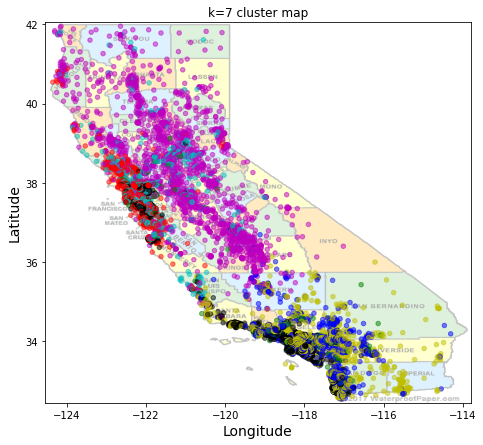

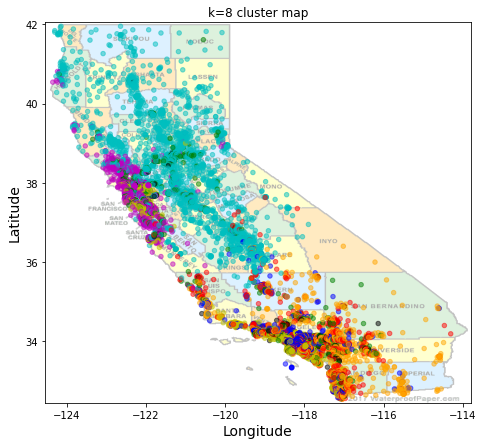

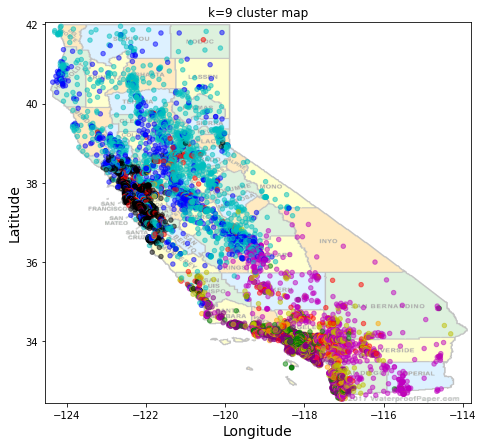

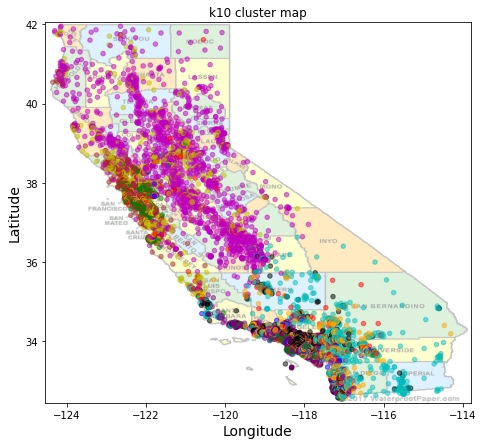

In [124]:
plot_clusters(populated2,"k=2 cluster map")
plot_clusters(populated3,"k=3 cluster map")
plot_clusters(populated4,"k=4 cluster map")
plot_clusters(populated5,"k=5 cluster map")
plot_clusters(populated6,"k=6 cluster map")
plot_clusters(populated7,"k=7 cluster map")
plot_clusters(populated8,"k=8 cluster map")
plot_clusters(populated9,"k=9 cluster map")
plot_clusters(populated10,"k10 cluster map")

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



**Answer:**

As you look at the clustering or even just the vizualization in the first part, you can see the housing on the coast near the water is significaltly more expensive than other areas. The clustering at k=4(you can see the titles of the plots above) showed us that the homes in these coast line cities such as LA, San Fran and San Deigo, are grouped together, not only because of the location but because of the price. Price is the reason why the cluster changes to a different centroid once you hit the outer edge of the cities.

Overall, most of the clustering looked fairly good, and when I say good, I mean it looks like we can analyze the plot and get some useful information out of it. The two extremes of k=2,3 and k=8,9,10 will be less useful but still good to see the difference. I would need to plot an elbow curve to find the optimal k, but in my opinion k=4,5,6 had the best generalizations.

A solution for the housing crisis is a complicated one because their are a lot of regulations involved. With that said, I think that slightly lowering the housing prices in the larger cities will lower the homelessness rate considering these cities have majority of the homeless population. However, you can only lower it so much before landlords dont make any money anymore. Therefore, in addtion, start ups and other businesses that move to these big cities, should be incentived to go to the cities with the lower housing prices, this way, more jobs will be avialable in areas with low housing costs. Lowering the pricing will prevent some from going homeless and allow upper percentile people to find homes again. The shift in the jobs to other cities will help a lot more than the price lowering but I think together, these ideas can slowly solve the crisis.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 3:...".

Best of luck and have fun!